In [22]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 

exp_list = [
# '/Volume/MoLeFlow/logs/baseline_v1.1_embed_dim_fix',
# '/Volume/MoLeFlow/logs/baseline_v1.1_embed_fix_jacobian_fix_no_ln_after_task0',
# '/Volume/MoLeFlow/logs/baseline_v1.2_embed_fix_jacobian_fix',
# '/Volume/MoLeFlow/logs/baseline_v1.3_embed_fix_jacobian_fix_soft_ln_init_scale_0.01',
# '/Volume/MoLeFlow/logs/baseline_v1.4_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_lambda_logdet_1e-5',
# '/Volume/MoLeFlow/logs/baseline_v1.5_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_lambda_logdet_1e-5_spatial_context_kernel_3',
# '/Volume/MoLeFlow/logs/baseline_v1.6_embed_fix_jacobian_fix_soft_ln_init_scale_0.01_scale_context_k3_a0.1',
# '/Volume/MoLeFlow/logs/baseline_v1.7_scale_context_k3_a0.1',
# '/Volume/MoLeFlow/logs/baseline_v1.8_patch_wise_context_gate_k3_hidden64',
# '/Volume/MoLeFlow/logs/moleflow_run_tests',
# '/Volume/MoLeFlow/logs/Version3-DIA_only',
# '/Volume/MoLeFlow/logs/Version3-OGP_only',
# '/Volume/MoLeFlow/logs/Version3-DIA_and_OGP',
# '/Volume/MoLeFlow/logs/Version3-All',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_only',
# '/Volume/MoLeFlow/logs/Version3-MSContext_only',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_OGP',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA_OGP',
# '/Volume/MoLeFlow/logs/Version3-MSContext_DIA',
# '/Volume/MoLeFlow/logs/Version3-MSContext_OGP',
# '/Volume/MoLeFlow/logs/Version3-MSContext_DIA_OGP',
# '/Volume/MoLeFlow/logs/Version3-WhiteningAdapter_DIA_OGP_TaskConditionedMSContext',
# '/Volume/MoLeFlow/logs/Version4-CompleteSeparation',
# '/Volume/MoLeFlow/logs/Version4.1-CompleteSeparation',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk10',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk5',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk3',
# '/Volume/MoLeFlow/logs/Version4.3-ScoreAgg_topk3_no_ln',
# '/Volume/MoLeFlow/logs/Version4.4-whitening_no_ln',
# '/Volume/MoLeFlow/logs/Version4.2-ScoreAgg_topk3',
# '/Volume/MoLeFlow/logs/Version5.1a-TailAwareLoss',
# '/Volume/MoLeFlow/logs/Version5.1b-SpatialCluster',
# '/Volume/MoLeFlow/logs/Version5.2a-SemanticProjector',
# '/Volume/MoLeFlow/logs/Version5.3a-GlobalContext',
# '/Volume/MoLeFlow/logs/Version5.5-Dir1-RelativePosition',
# '/Volume/MoLeFlow/logs/Version5.5-Dir3-LocalConsistency',
# '/Volume/MoLeFlow/logs/Version5.5-Dir1+Dir3-Combined',
# '/Volume/MoLeFlow/logs/Version5.5-Dir2-DualBranch',
# '/Volume/MoLeFlow/logs/Version5.6-ImprovedDualBranch',
# '/Volume/MoLeFlow/logs/Version5.6-ScoreGuidedDual',
# '/Volume/MoLeFlow/logs/Version5.6-MultiScaleConsistency',
# '/Volume/MoLeFlow/logs/Version5.6-Combined',
# '/Volume/MoLeFlow/logs/Version5.7-DirC-MultiOrientation',
# '/Volume/MoLeFlow/logs/Version5.7-DirD-ContentBasedPE',
# '/Volume/MoLeFlow/logs/Version5.7-DirE-HybridPE',
# '/Volume/MoLeFlow/logs/Version5.7-Baseline-LocalConsistency',
'/Volume/MoLeFlow/logs/Version5.8-TAPE',
# '/Volume/MoLeFlow/logs/Version5.8-TAPE-v2',
'/Volume/MoLeFlow/logs/Version5-Final-50epochs',
'/Volume/MoLeFlow/logs/Version5-Final-60epochs',
# '/Volume/MoLeFlow/logs/HP-NoWhitening',
# '/Volume/MoLeFlow/logs/HP-NoDIA',
# '/Volume/MoLeFlow/logs/HP-Simple',
# '/Volume/MoLeFlow/logs/HP-Baseline',
# '/Volume/MoLeFlow/logs/HP-TopK1',
# '/Volume/MoLeFlow/logs/HP-TopK5',
# '/Volume/MoLeFlow/logs/HP-TopK10',
# '/Volume/MoLeFlow/logs/HP-Mean',
# '/Volume/MoLeFlow/logs/HP-NoTail',
# '/Volume/MoLeFlow/logs/HP-Tail0.1',
# '/Volume/MoLeFlow/logs/HP-Tail0.5',
# '/Volume/MoLeFlow/logs/HP-Tail0.7',
# '/Volume/MoLeFlow/logs/HP-Coupling12',
# '/Volume/MoLeFlow/logs/HP-Coupling16',
# '/Volume/MoLeFlow/logs/HP-LoRA32',
# '/Volume/MoLeFlow/logs/HP-LoRA128',
# '/Volume/MoLeFlow/logs/HP-LR5e-5',
# '/Volume/MoLeFlow/logs/HP-LR2e-4',
# '/Volume/MoLeFlow/logs/HP-Epochs60',
'/Volume/MoLeFlow/logs/HP-Epochs80',
# '/Volume/MoLeFlow/logs/HP-Simple-TopK1',
# '/Volume/MoLeFlow/logs/HP-Simple-Mean',
# '/Volume/MoLeFlow/logs/HP-Simple-Coupling16',
# '/Volume/MoLeFlow/logs/HP-Simple-LoRA128-Coupling12',
# '/Volume/MoLeFlow/logs/V6-NoLoRA',
# '/Volume/MoLeFlow/logs/V6-TaskSeparated',
# '/Volume/MoLeFlow/logs/V6-NoLoRA-TaskSep',
# '/Volume/MoLeFlow/logs/V6-SpectralNorm',
'/Volume/MoLeFlow/logs/V5-Final-10epochs',
'/Volume/MoLeFlow/logs/V5-Final-80epochs'
]

metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
df = pd.DataFrame()
for exp_path in exp_list:
    for log_path in glob(os.path.join(exp_path, 'final_results.csv')):
        temp_df = pd.read_csv(log_path)
        # metrics 컬럼을 float로 변환
        for m in metrics:
            if m in temp_df.columns:
                temp_df[m] = pd.to_numeric(temp_df[m], errors='coerce')
        temp_df['exp_name'] = os.path.basename(exp_path)
        df = pd.concat([df, temp_df], ignore_index=True)


In [23]:
# 클래스별(exp_name 별) 비교 - pivot 테이블로 각 Class별로 exp_name을 컬럼으로 비교 
if 'Class Name' in df.columns and 'exp_name' in df.columns:
    class_metric = 'Class Name'
    compare_metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
    # 피벗: index는 Class Name, columns는 exp_name, 값은 metric
    pivot = {}
    for m in compare_metrics:
        if m in df.columns:
            pt = df[df[class_metric]!=''].pivot_table(index=class_metric, columns='exp_name', values=m)
            pt.loc['Average'] = pt.mean()
            pivot[m] = pt
    # 원하는 메트릭 하나 예시 출력 (여러개면 loop)
    for m, pt in pivot.items():
        display(pt.style.set_caption(m))

In [24]:
# 클래스별(exp_name 별) 비교 - bar plot으로 각 Class별 exp_name 시각화
import matplotlib.pyplot as plt
import seaborn as sns

if 'Class Name' in df.columns and 'exp_name' in df.columns:
    class_metric = 'Class Name'
    compare_metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
    for m in compare_metrics:
        if m in df.columns:
            plot_df = df[df[class_metric]!=''][[class_metric, 'exp_name', m]].dropna()
            plt.figure(figsize=(12, 5))
            sns.barplot(
                data=plot_df,
                x=class_metric, y=m, hue='exp_name'
            )
            plt.title(f'{m} by Class and Experiment')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.legend(loc='best')
            plt.show()

In [25]:
# The error is due to non-unique index, so we must reset the index for Styler to work.
df[df['Task ID']=='Mean'].reset_index(drop=True).style.set_properties(
    subset=['exp_name'], **{'max-width': '600px', 'white-space': 'pre-wrap'}
)

KeyError: 'Task ID'

In [ ]:
# The error is due to non-unique index, so we must reset the index for Styler to work.
df[(df['Task ID']=='Mean')&(df['exp_name'].apply(lambda x : 'WhiteningAdapter' in x))].reset_index(drop=True).style.set_properties(
    subset=['exp_name'], **{'max-width': '600px', 'white-space': 'pre-wrap'}
)

,Task ID,Class Name,Routing Acc (%),Image AUC,Pixel AUC,Image AP,Pixel AP,exp_name


# All classes

In [ ]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 

# 왜 glob에 결과가 없어?
exp_list = [
    '/Volume/MoLeFlow/logs/Version4.3-ScoreAgg_topk3_all_classes_alphabet_order',
    '/Volume/MoLeFlow/logs/Version5.7-DirC-MultiOrientation_all_classes',
    '/Volume/MoLeFlow/logs/Version5-Final-all_classes'
]

df = pd.DataFrame()

for exp_path in exp_list:
    search_path = os.path.join(exp_path, 'final_results.csv')
    found_files = glob(search_path)    
    for log_path in found_files:
        temp_df = pd.read_csv(log_path)
        temp_df['exp_name'] = os.path.basename(exp_path)
        df = pd.concat([df, temp_df])



In [ ]:
df_exp_mean

,exp_name,Image AUC,Pixel AUC,Image AP,Pixel AP
0,HP-Exp1-epochs80,0.90800,0.97672,0.95038,0.43978
1,HP-Exp2-lr2e-4,0.93220,0.97762,0.97156,0.43742
2,HP-Exp3-coupling12,0.92906,0.97648,0.97332,0.45206
3,HP-Exp4-dia4,0.93468,0.97732,0.97362,0.43026
4,HP-Exp5-logdet3e-5,0.91778,0.97662,0.96764,0.44996
5,HP-Exp6-topk5,0.91968,0.97608,0.96904,0.44296
6,V5-MVTec-WideResNet50-60epochs-all_classes,0.90372,0.97638,0.95678,0.44532


In [ ]:
df_exp_mean

,exp_name,Image AUC,Pixel AUC,Image AP,Pixel AP
0,Version4.3-ScoreAgg_topk3_all_classes_alphabet...,0.89715,0.929614,0.949393,0.359507


In [ ]:
import os 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 


img_paths = glob('/Data/mpdd/metal_plate/test/scratches/*.png')[:9]
mask_paths = [p.replace('/test/', '/ground_truth/').replace('.png', '_mask.png') for p in img_paths]

fig, axes = plt.subplots(3, 6, figsize=(20, 10))

for i, (img_p, mask_p) in enumerate(zip(img_paths, mask_paths)):
    # 원본 이미지
    img = cv2.imread(img_p)[:,:,::-1]
    axes[i//3, (i%3)*2].imshow(img)
    axes[i//3, (i%3)*2].set_title('Image')
    axes[i//3, (i%3)*2].axis('off')
    # 마스크(Ground Truth)
    if os.path.exists(mask_p):
        mask = cv2.imread(mask_p, 0)
        axes[i//3, (i%3)*2+1].imshow(mask, cmap='gray')
        axes[i//3, (i%3)*2+1].set_title('GT Mask')
    else:
        axes[i//3, (i%3)*2+1].imshow(np.zeros_like(img[:,:,0]), cmap='gray')
        axes[i//3, (i%3)*2+1].set_title('GT Mask (not found)')
    axes[i//3, (i%3)*2+1].axis('off')

plt.tight_layout()
plt.show()








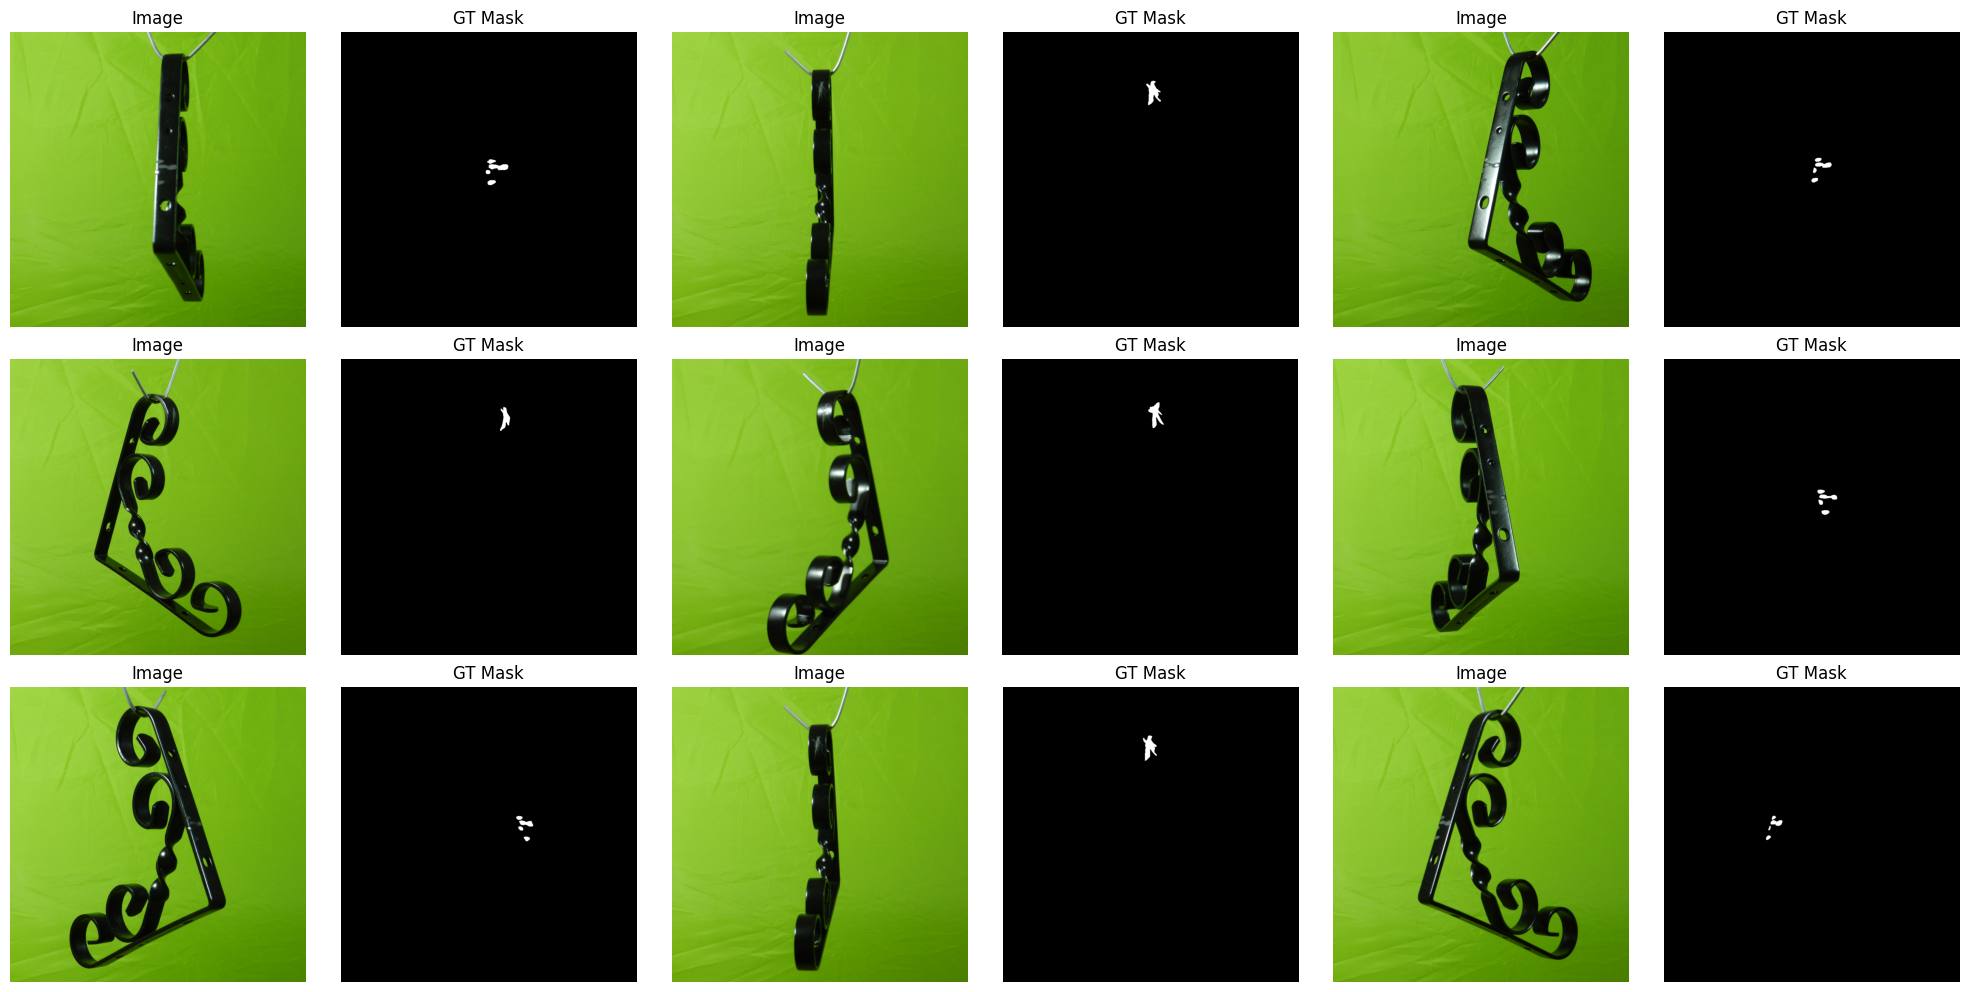

In [ ]:
import os 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 


img_paths = glob('/Data/mpdd/bracket_black/test/scratches/*.png')[:9]
mask_paths = [p.replace('/test/', '/ground_truth/').replace('.png', '_mask.png') for p in img_paths]

fig, axes = plt.subplots(3, 6, figsize=(20, 10))

for i, (img_p, mask_p) in enumerate(zip(img_paths, mask_paths)):
    # 원본 이미지
    img = cv2.imread(img_p)[:,:,::-1]
    axes[i//3, (i%3)*2].imshow(img)
    axes[i//3, (i%3)*2].set_title('Image')
    axes[i//3, (i%3)*2].axis('off')
    # 마스크(Ground Truth)
    if os.path.exists(mask_p):
        mask = cv2.imread(mask_p, 0)
        axes[i//3, (i%3)*2+1].imshow(mask, cmap='gray')
        axes[i//3, (i%3)*2+1].set_title('GT Mask')
    else:
        axes[i//3, (i%3)*2+1].imshow(np.zeros_like(img[:,:,0]), cmap='gray')
        axes[i//3, (i%3)*2+1].set_title('GT Mask (not found)')
    axes[i//3, (i%3)*2+1].axis('off')

plt.tight_layout()
plt.show()








# HP Tuning

In [26]:
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from glob import glob 
import json 

exp_list = [
'/Volume/MoLeFlow/logs/V5/V5-MVTec-WideResNet50-60epochs-all_classes',
'/Volume/MoLeFlow/logs/HP-Exp1-epochs80',
'/Volume/MoLeFlow/logs/HP-Exp2-lr2e-4',
'/Volume/MoLeFlow/logs/HP-Exp3-coupling12',
'/Volume/MoLeFlow/logs/HP-Exp4-dia4',
'/Volume/MoLeFlow/logs/HP-Exp5-logdet3e-5',
'/Volume/MoLeFlow/logs/HP-Exp6-topk5',
'/Volume/MoLeFlow/logs/HP-Exp7-lr2e-4-dia4'


]

metrics = ['Image AUC', 'Pixel AUC', 'Image AP', 'Pixel AP']
df = pd.DataFrame()
for exp_path in exp_list:
    for log_path in glob(os.path.join(exp_path, 'final_results.csv')):
        temp_df = pd.read_csv(log_path)
        # metrics 컬럼을 float로 변환
        for m in metrics:
            if m in temp_df.columns:
                temp_df[m] = pd.to_numeric(temp_df[m], errors='coerce')
        temp_df['exp_name'] = os.path.basename(exp_path)
        df = pd.concat([df, temp_df], ignore_index=True)


In [27]:
# 'Class Name'이 'Overall'이 아닌 행들만 남기고,
# exp_name별 aggregate(전체 평균)와 class별 metric을 모두 구합니다.
metrics = ['Image AUC',  'Pixel AUC']
target_classes = ['bottle', 'cable', 'capsule', 'screw', 'toothbrush']

df_filtered = df[df['Class Name'].isin(target_classes)].copy()
for m in metrics:
    df_filtered[m] = pd.to_numeric(df_filtered[m], errors='coerce')

# exp_name별 전체 평균
df_exp_mean = df_filtered.groupby('exp_name')[metrics].mean().reset_index()

# exp_name별 클래스별 결과(피벗 테이블 형식)
df_class_compare = df_filtered.pivot_table(index='Class Name', columns='exp_name', values=metrics)

# 원본처럼 mean도 유지(각 실험별 전체 평균)
display(df_exp_mean)
# 클래스별 비교 표도 표시
display(df_class_compare)


,exp_name,Image AUC,Pixel AUC
0,HP-Exp1-epochs80,0.90800,0.97672
1,HP-Exp2-lr2e-4,0.93220,0.97762
2,HP-Exp3-coupling12,0.92906,0.97648
3,HP-Exp4-dia4,0.93468,0.97732
4,HP-Exp5-logdet3e-5,0.91778,0.97662
5,HP-Exp6-topk5,0.91968,0.97608
6,HP-Exp7-lr2e-4-dia4,0.94676,0.97788
7,V5-MVTec-WideResNet50-60epochs-all_classes,0.90372,0.97638


Image AUC                                                 \
exp_name   HP-Exp1-epochs80 HP-Exp2-lr2e-4 HP-Exp3-coupling12 HP-Exp4-dia4   
Class Name                                                                   
bottle               1.0000         1.0000             1.0000       1.0000   
cable                0.9801         0.9844             0.9702       0.9829   
capsule              0.9202         0.9390             0.9150       0.9410   
screw                0.8397         0.8737             0.8545       0.8717   
toothbrush           0.8000         0.8639             0.9056       0.8778   

                                                                 \
exp_name   HP-Exp5-logdet3e-5 HP-Exp6-topk5 HP-Exp7-lr2e-4-dia4   
Class Name                                                        
bottle                 1.0000        1.0000              1.0000   
cable                  0.9769        0.9796              0.9884   
capsule                0.8991        0.8975              0.9609   
screw                  0.8379        0.8352              0.9067   
toothbrush             0.8750        0.8861              0.8778   

                                                             Pixel AUC  \
exp_name   V5-MVTec-WideResNet50-60epochs-all_classes HP-Exp1-epochs80   
Class Name                                                               
bottle                                         1.0000           0.9682   
cable                                          0.9773           0.9690   
capsule                                        0.8979           0.9857   
screw                                          0.8323           0.9766   
toothbrush                                     0.8111           0.9841   

                                                                              \
exp_name   HP-Exp2-lr2e-4 HP-Exp3-coupling12 HP-Exp4-dia4 HP-Exp5-logdet3e-5   
Class Name                                                                     
bottle             0.9664             0.9695       0.9660             0.9714   
cable              0.9713             0.9687       0.9723             0.9673   
capsule            0.9858             0.9861       0.9857             0.9858   
screw              0.9800             0.9737       0.9794             0.9732   
toothbrush         0.9846             0.9844       0.9832             0.9854   

                                              \
exp_name   HP-Exp6-topk5 HP-Exp7-lr2e-4-dia4   
Class Name                                     
bottle            0.9694              0.9642   
cable             0.9675              0.9750   
capsule           0.9856              0.9854   
screw             0.9727              0.9831   
toothbrush        0.9852              0.9817   

                                                       
exp_name   V5-MVTec-WideResNet50-60epochs-all_classes  
Class Name                                             
bottle                                         0.9694  
cable                                          0.9675  
capsule                                        0.9856  
screw                                          0.9738  
toothbrush                                     0.9856